Comparison Abramowitz and Stegun (1970) approximation with scipy E1

In [14]:
from scipy.special import expn
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
# jax.numpy is float32

In [15]:
def E1_AS(dtauM):
    """Abramowitz Stegun (1970) approximation of E1
    
    """
    A0=-0.57721566
    A1= 0.99999193
    A2=-0.24991055
    A3= 0.05519968
    A4=-0.00976004
    A5= 0.00107857
    B1=8.5733287401
    B2=18.059016973
    B3=8.6347608925
    B4=0.2677737343
    C1=9.5733223454
    C2=25.6329561486
    C3=21.0996530827
    C4=3.9584969228
    
    dtauM2=dtauM**2
    dtauM3=dtauM**3
    dtauM4=dtauM**4
    dtauM5=dtauM**5
    ep1A=-jnp.log(dtauM)+A0+A1*dtauM+A2*dtauM2+A3*dtauM3+A4*dtauM4+A5*dtauM5
    ep1B=jnp.exp(-dtauM)/dtauM*\
    (dtauM4+B1*dtauM3+B2*dtauM2+B3*dtauM+B4)/\
    (dtauM4+C1*dtauM3+C2*dtauM2+C3*dtauM+C4)
    ep=jnp.where(dtauM<=1.0, ep1A, ep1B)
    return ep

In [34]:
E1_AS(10**1.9),expn(1,10**1.9)

(Buffer(3.9572687e-37, dtype=float32), 3.957266638708871e-37)

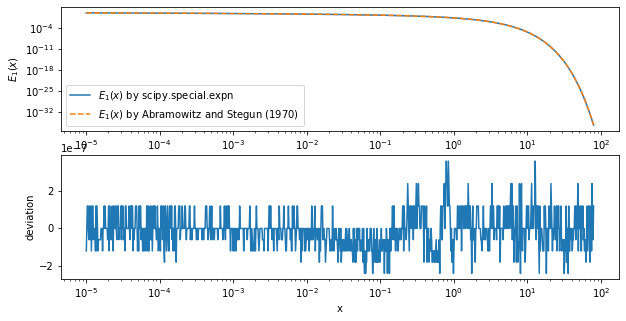

In [27]:
x=jnp.logspace(-5,1.9,1000)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(211)
plt.plot(x,expn(1,x),label="$E_1(x)$ by scipy.special.expn")
plt.plot(x,E1_AS(x),ls="dashed",label="$E_1(x)$ by Abramowitz and Stegun (1970) ")
plt.ylabel("$E_1(x)$")
plt.yscale("log")
plt.legend()
plt.xscale("log")
ax=fig.add_subplot(212)
plt.plot(x,E1_AS(x)/expn(1,x)-1.0)
plt.xscale("log")
plt.ylabel("deviation")
plt.xlabel("x")
plt.savefig("../../documents/figures/E1.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("../../documents/figures/E1.png", bbox_inches="tight", pad_inches=0.0)

In [35]:
def E3_AS(dtauM):
    """E3 using Abramowitz Stegun (1970) approximation of E1
    
    """
    return ((1.0-dtauM)*jnp.exp(-dtauM) + dtauM**2*E1_AS(dtauM))/2.0

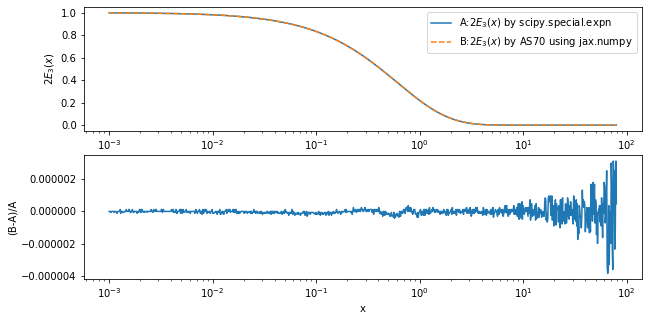

In [43]:
x=np.logspace(-3,1.9,1000)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(211)
plt.plot(x,2.0*expn(3,x),label="A:$2 E_3(x)$ by scipy.special.expn")
plt.plot(x,2.0*E3_AS(x),ls="dashed",label="B:$2 E_3(x)$ by AS70 using jax.numpy ")
plt.ylabel("$2 E_3(x)$")
plt.legend()
plt.xscale("log")
ax=fig.add_subplot(212)
plt.plot(x,E1_AS(x)/expn(1,x)-1.0)
plt.xscale("log")
plt.ylabel("(B-A)/A")
plt.xlabel("x")
plt.savefig("../../documents/figures/E3.pdf", bbox_inches="tight", pad_inches=0.0)
plt.savefig("../../documents/figures/E3.png", bbox_inches="tight", pad_inches=0.0)